In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

In [2]:
root = './distilled_dataset'

### CIFAR10 Distilled

In [3]:
class CIFAR10_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [4]:
index_file = pd.read_csv('./CIFAR10_DM_index_files/ipc500_idx.csv')
index_file

,image_path,label
0,./CIFAR10_DM/ipc500/airplane/003746e7-c915-4d7...,0
1,./CIFAR10_DM/ipc500/airplane/0090a052-69a0-461...,0
2,./CIFAR10_DM/ipc500/airplane/0143960d-3978-448...,0
3,./CIFAR10_DM/ipc500/airplane/01ee79d8-a8fe-430...,0
4,./CIFAR10_DM/ipc500/airplane/0231edfd-42fd-477...,0
...,...,...
4995,./CIFAR10_DM/ipc500/truck/fb1fbeaf-b6c7-4da4-a...,9
4996,./CIFAR10_DM/ipc500/truck/fcd9e0b0-9b62-4d41-8...,9
4997,./CIFAR10_DM/ipc500/truck/fdefdd6d-2fd9-42f1-b...,9
4998,./CIFAR10_DM/ipc500/truck/ff83d309-da9a-459a-a...,9


In [5]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              ])
cifar10_distilled_train = CIFAR10_Distilled(index_file, transform)

cifar10_root = '../cifar10'
cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [6]:
batch_size = 16 # cut batch size to half for ipc50
train_data_loader, test_data_loader = get_data_loaders(cifar10_distilled_train, cifar10_test, batch_size=batch_size)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [8]:
model_name = 'alexnet'
dataset = 'cifar10_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
model = torchvision.models.alexnet(num_classes=10).to(device)

In [9]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

c:\Users\Andrew\envs\CS5340\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1: 100%|██████████| 313/313 [00:44<00:00,  6.96it/s, loss=1.79] 


epoch: 1 done, loss: 0.11926744133234024
Acc: 0.2578
[0.01]


Epoch 2: 100%|██████████| 313/313 [00:33<00:00,  9.24it/s, loss=1.43] 


epoch: 2 done, loss: 0.10071976482868195
Acc: 0.2946
[0.01]


Epoch 3: 100%|██████████| 313/313 [00:11<00:00, 28.01it/s, loss=1.09] 


epoch: 3 done, loss: 0.07475791871547699
Acc: 0.357
[0.01]


Epoch 4: 100%|██████████| 313/313 [00:11<00:00, 27.22it/s, loss=0.589]


epoch: 4 done, loss: 0.0628717839717865
Acc: 0.3778
[0.01]


Epoch 5: 100%|██████████| 313/313 [00:11<00:00, 27.64it/s, loss=1.23] 


epoch: 5 done, loss: 0.05680788308382034
Acc: 0.388
[0.01]


Epoch 6: 100%|██████████| 313/313 [00:11<00:00, 27.59it/s, loss=0.644]


epoch: 6 done, loss: 0.05429188534617424
Acc: 0.4276
[0.01]


Epoch 7: 100%|██████████| 313/313 [00:11<00:00, 26.41it/s, loss=0.47]  


epoch: 7 done, loss: 0.046986352652311325
Acc: 0.4349
[0.01]


Epoch 8: 100%|██████████| 313/313 [00:11<00:00, 27.28it/s, loss=0.319]


epoch: 8 done, loss: 0.045603856444358826
Acc: 0.4
[0.01]


Epoch 9: 100%|██████████| 313/313 [00:11<00:00, 27.90it/s, loss=0.368]


epoch: 9 done, loss: 0.045809075236320496
Acc: 0.4064
[0.01]


Epoch 10: 100%|██████████| 313/313 [00:11<00:00, 28.14it/s, loss=1.68] 


epoch: 10 done, loss: 0.04087197408080101
Acc: 0.3963
[0.01]


Epoch 11: 100%|██████████| 313/313 [00:11<00:00, 28.40it/s, loss=0.583] 


epoch: 11 done, loss: 0.04420126602053642
Acc: 0.4507
[0.01]


Epoch 12: 100%|██████████| 313/313 [00:11<00:00, 27.69it/s, loss=0.403]


epoch: 12 done, loss: 0.0384112223982811
Acc: 0.4232
[0.01]


Epoch 13: 100%|██████████| 313/313 [00:11<00:00, 27.68it/s, loss=0.496] 


epoch: 13 done, loss: 0.036128997802734375
Acc: 0.4277
[0.01]


Epoch 14: 100%|██████████| 313/313 [00:11<00:00, 27.99it/s, loss=0.135] 


epoch: 14 done, loss: 0.038194768130779266
Acc: 0.4728
[0.01]


Epoch 15: 100%|██████████| 313/313 [00:11<00:00, 28.45it/s, loss=1.46]  


epoch: 15 done, loss: 0.037934038788080215
Acc: 0.413
[0.01]


Epoch 16: 100%|██████████| 313/313 [00:11<00:00, 28.30it/s, loss=0.636] 


epoch: 16 done, loss: 0.03885750472545624
Acc: 0.4201
[0.01]


Epoch 17: 100%|██████████| 313/313 [00:11<00:00, 27.80it/s, loss=0.569] 


epoch: 17 done, loss: 0.038755469024181366
Acc: 0.3647
[0.001]


Epoch 18: 100%|██████████| 313/313 [00:11<00:00, 27.63it/s, loss=0.0568] 


epoch: 18 done, loss: 0.02012290433049202
Acc: 0.4975
[0.001]


Epoch 19: 100%|██████████| 313/313 [00:11<00:00, 27.63it/s, loss=0.069] 


epoch: 19 done, loss: 0.013953989371657372
Acc: 0.5107
[0.001]


Epoch 20: 100%|██████████| 313/313 [00:11<00:00, 27.92it/s, loss=0.0869] 


epoch: 20 done, loss: 0.010734655894339085
Acc: 0.5267
[0.001]


Epoch 21: 100%|██████████| 313/313 [00:11<00:00, 28.12it/s, loss=0.0869] 


epoch: 21 done, loss: 0.009987722150981426
Acc: 0.5266
[0.001]


Epoch 22: 100%|██████████| 313/313 [00:11<00:00, 27.90it/s, loss=0.0383]  


epoch: 22 done, loss: 0.008008955046534538
Acc: 0.5314
[0.001]


Epoch 23: 100%|██████████| 313/313 [00:11<00:00, 28.07it/s, loss=0.0237]  


epoch: 23 done, loss: 0.007342842873185873
Acc: 0.5299
[0.001]


Epoch 24: 100%|██████████| 313/313 [00:11<00:00, 28.11it/s, loss=0.0753]  


epoch: 24 done, loss: 0.006174155976623297
Acc: 0.5374
[0.001]


Epoch 25: 100%|██████████| 313/313 [00:11<00:00, 27.47it/s, loss=0.0132]  


epoch: 25 done, loss: 0.005590661894530058
Acc: 0.5403
[0.001]


Epoch 26: 100%|██████████| 313/313 [00:11<00:00, 28.16it/s, loss=0.00108] 


epoch: 26 done, loss: 0.004925955086946487
Acc: 0.54
[0.001]


Epoch 27: 100%|██████████| 313/313 [00:11<00:00, 27.53it/s, loss=3.45e-5] 


epoch: 27 done, loss: 0.004008758347481489
Acc: 0.5364
[0.001]


Epoch 28: 100%|██████████| 313/313 [00:11<00:00, 27.71it/s, loss=0.00559] 


epoch: 28 done, loss: 0.003546154359355569
Acc: 0.5396
[0.001]


Epoch 29: 100%|██████████| 313/313 [00:11<00:00, 27.73it/s, loss=0.00438] 


epoch: 29 done, loss: 0.003246705513447523
Acc: 0.5435
[0.001]


Epoch 30: 100%|██████████| 313/313 [00:11<00:00, 28.38it/s, loss=0.0199]  


epoch: 30 done, loss: 0.0035329791717231274
Acc: 0.5437
[0.001]


Epoch 31: 100%|██████████| 313/313 [00:10<00:00, 28.74it/s, loss=0.0187]  


epoch: 31 done, loss: 0.0021579547319561243
Acc: 0.5462
[0.001]


Epoch 32: 100%|██████████| 313/313 [00:11<00:00, 27.84it/s, loss=0.0021]  


epoch: 32 done, loss: 0.0020246505737304688
Acc: 0.5473
[0.001]


Epoch 33: 100%|██████████| 313/313 [00:11<00:00, 28.29it/s, loss=0.00121] 


epoch: 33 done, loss: 0.0018055682303383946
Acc: 0.5412
[0.001]


Epoch 34: 100%|██████████| 313/313 [00:11<00:00, 28.15it/s, loss=0.000198]


epoch: 34 done, loss: 0.0019695295486599207
Acc: 0.5468
[0.001]


Epoch 35: 100%|██████████| 313/313 [00:11<00:00, 27.93it/s, loss=0.0543]  


epoch: 35 done, loss: 0.0014498635428026319
Acc: 0.5481
[0.001]


Epoch 36: 100%|██████████| 313/313 [00:10<00:00, 30.40it/s, loss=6.98e-5] 


epoch: 36 done, loss: 0.0018474208191037178
Acc: 0.5504
[0.001]


Epoch 37: 100%|██████████| 313/313 [00:11<00:00, 28.36it/s, loss=0.00345] 


epoch: 37 done, loss: 0.0011031422764062881
Acc: 0.5544
[0.001]


Epoch 38: 100%|██████████| 313/313 [00:11<00:00, 27.53it/s, loss=0.00622] 


epoch: 38 done, loss: 0.0012580567272379994
Acc: 0.5539
[0.001]


Epoch 39: 100%|██████████| 313/313 [00:10<00:00, 28.49it/s, loss=2.69e-5] 


epoch: 39 done, loss: 0.0010623200796544552
Acc: 0.5499
[0.001]


Epoch 40: 100%|██████████| 313/313 [00:10<00:00, 28.51it/s, loss=0.00638] 


epoch: 40 done, loss: 0.0008585489122197032
Acc: 0.5496
[0.001]


Epoch 41: 100%|██████████| 313/313 [00:11<00:00, 28.15it/s, loss=0.000425]


epoch: 41 done, loss: 0.0007140956586226821
Acc: 0.547
[0.001]


Epoch 42: 100%|██████████| 313/313 [00:10<00:00, 29.10it/s, loss=0.00495] 


epoch: 42 done, loss: 0.0008302145870402455
Acc: 0.5537
[0.001]


Epoch 43: 100%|██████████| 313/313 [00:11<00:00, 28.05it/s, loss=7.67e-5] 


epoch: 43 done, loss: 0.0006073654512874782
Acc: 0.5475
[0.001]


Epoch 44: 100%|██████████| 313/313 [00:11<00:00, 28.19it/s, loss=0.00939] 


epoch: 44 done, loss: 0.0005560493445955217
Acc: 0.5508
[0.001]


Epoch 45: 100%|██████████| 313/313 [00:10<00:00, 28.58it/s, loss=0.000448]


epoch: 45 done, loss: 0.0009783445857465267
Acc: 0.5442
[0.001]


Epoch 46: 100%|██████████| 313/313 [00:10<00:00, 28.46it/s, loss=0.00158] 


epoch: 46 done, loss: 0.0005844025290571153
Acc: 0.5467
[0.001]


Epoch 47: 100%|██████████| 313/313 [00:11<00:00, 27.90it/s, loss=7.05e-6] 


epoch: 47 done, loss: 0.00042479822877794504
Acc: 0.5542
[0.001]


Epoch 48: 100%|██████████| 313/313 [00:11<00:00, 27.47it/s, loss=1.74e-5] 


epoch: 48 done, loss: 0.00038513322942890227
Acc: 0.5523
[0.001]


Epoch 49: 100%|██████████| 313/313 [00:11<00:00, 28.39it/s, loss=0.00115] 


epoch: 49 done, loss: 0.0007827302324585617
Acc: 0.5477
[0.001]


Epoch 50: 100%|██████████| 313/313 [00:11<00:00, 27.96it/s, loss=2.45e-5] 


epoch: 50 done, loss: 0.0008076344383880496
Acc: 0.5497
[0.001]


Epoch 51: 100%|██████████| 313/313 [00:11<00:00, 27.95it/s, loss=1.49e-7] 


epoch: 51 done, loss: 0.0008693859563209116
Acc: 0.5423
[0.001]


Epoch 52: 100%|██████████| 313/313 [00:11<00:00, 28.00it/s, loss=1.82e-6] 


epoch: 52 done, loss: 0.0004362088511697948
Acc: 0.5463
[0.0001]


Epoch 53: 100%|██████████| 313/313 [00:11<00:00, 28.02it/s, loss=0.00376] 


epoch: 53 done, loss: 0.00027196481823921204
Acc: 0.545
[0.0001]


Epoch 54: 100%|██████████| 313/313 [00:11<00:00, 28.19it/s, loss=0]       


epoch: 54 done, loss: 0.0003014681860804558
Acc: 0.5456
[0.0001]


Epoch 55: 100%|██████████| 313/313 [00:11<00:00, 28.25it/s, loss=1.09e-6] 


epoch: 55 done, loss: 0.00018904356693383306
Acc: 0.5456
[0.0001]


Epoch 56: 100%|██████████| 313/313 [00:11<00:00, 28.16it/s, loss=8.38e-5] 


epoch: 56 done, loss: 0.000282875495031476
Acc: 0.5476
[0.0001]


Epoch 57: 100%|██████████| 313/313 [00:11<00:00, 27.90it/s, loss=0]       


epoch: 57 done, loss: 0.0002799465146381408
Acc: 0.5462
[0.0001]


Epoch 58: 100%|██████████| 313/313 [00:11<00:00, 27.34it/s, loss=0.00446] 


epoch: 58 done, loss: 0.00016480969497933984
Acc: 0.5483
[0.0001]


Epoch 59: 100%|██████████| 313/313 [00:11<00:00, 27.91it/s, loss=0.000365]


epoch: 59 done, loss: 0.00020033199689351022
Acc: 0.5485
[0.0001]


Epoch 60: 100%|██████████| 313/313 [00:11<00:00, 27.34it/s, loss=0.00256] 


epoch: 60 done, loss: 0.0003435066028032452
Acc: 0.5489
[0.0001]


Epoch 61: 100%|██████████| 313/313 [00:10<00:00, 28.78it/s, loss=0.000992]


epoch: 61 done, loss: 0.00019666898879222572
Acc: 0.5488
[0.0001]


Epoch 62: 100%|██████████| 313/313 [00:11<00:00, 27.75it/s, loss=0.00395] 


epoch: 62 done, loss: 0.0002468710590619594
Acc: 0.5496
[1e-05]


Epoch 63: 100%|██████████| 313/313 [00:11<00:00, 27.30it/s, loss=0.000285]


epoch: 63 done, loss: 0.00014669852680526674
Acc: 0.5498
[1e-05]


Epoch 64: 100%|██████████| 313/313 [00:10<00:00, 28.66it/s, loss=6.26e-7] 


epoch: 64 done, loss: 0.00025217150687240064
Acc: 0.5495
[1e-05]


Epoch 65: 100%|██████████| 313/313 [00:10<00:00, 28.47it/s, loss=4.17e-7] 


epoch: 65 done, loss: 0.0001883985969470814
Acc: 0.5496
[1e-05]


Epoch 66: 100%|██████████| 313/313 [00:11<00:00, 28.07it/s, loss=0.000228]


epoch: 66 done, loss: 0.00015450925275217742
Acc: 0.5496
[1e-05]


Epoch 67: 100%|██████████| 313/313 [00:11<00:00, 28.13it/s, loss=1.79e-6] 


epoch: 67 done, loss: 0.00030858267564326525
Acc: 0.5498
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 313/313 [00:10<00:00, 28.67it/s, loss=1.42e-6] 


epoch: 68 done, loss: 0.00014030063175596297
Acc: 0.5497
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 313/313 [00:10<00:00, 29.03it/s, loss=0.000117]


epoch: 69 done, loss: 0.0001526599662611261
Acc: 0.5497
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 313/313 [00:11<00:00, 27.73it/s, loss=0.000376]


epoch: 70 done, loss: 0.00017162114090751857
Acc: 0.5499
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 313/313 [00:11<00:00, 27.89it/s, loss=0.000256]


epoch: 71 done, loss: 0.00014231215754989535
Acc: 0.5499
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 313/313 [00:11<00:00, 28.34it/s, loss=5.37e-5] 


epoch: 72 done, loss: 0.00018705925322137773
Acc: 0.55
[1.0000000000000002e-07]


Epoch 73: 100%|██████████| 313/313 [00:11<00:00, 28.12it/s, loss=0.00058] 


epoch: 73 done, loss: 0.00019039194739889354
Acc: 0.5501
[1.0000000000000002e-07]


Epoch 74: 100%|██████████| 313/313 [00:11<00:00, 27.54it/s, loss=0.000367]


epoch: 74 done, loss: 0.00021305095287971199
Acc: 0.55
[1.0000000000000002e-07]


Epoch 75: 100%|██████████| 313/313 [00:11<00:00, 28.14it/s, loss=0.000162]


epoch: 75 done, loss: 0.00017914501950144768
Acc: 0.55
[1.0000000000000002e-07]


Epoch 76: 100%|██████████| 313/313 [00:11<00:00, 28.33it/s, loss=2.89e-6] 


epoch: 76 done, loss: 0.00021983460464980453
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 77: 100%|██████████| 313/313 [00:12<00:00, 25.23it/s, loss=0.114]   


epoch: 77 done, loss: 0.00016207281441893429
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 78: 100%|██████████| 313/313 [00:11<00:00, 26.53it/s, loss=0.00141] 


epoch: 78 done, loss: 0.0001281644363189116
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 79: 100%|██████████| 313/313 [00:11<00:00, 27.61it/s, loss=0.00121] 


epoch: 79 done, loss: 0.0001168141097878106
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 80: 100%|██████████| 313/313 [00:11<00:00, 27.95it/s, loss=1.89e-5] 


epoch: 80 done, loss: 0.00018945441115647554
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 81: 100%|██████████| 313/313 [00:11<00:00, 27.50it/s, loss=0.128]   


epoch: 81 done, loss: 0.00022534832532983273
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 82: 100%|██████████| 313/313 [00:11<00:00, 27.31it/s, loss=3.37e-5] 


epoch: 82 done, loss: 0.00014946940063964576
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 83: 100%|██████████| 313/313 [00:10<00:00, 28.82it/s, loss=6.59e-5] 


epoch: 83 done, loss: 0.00018275038746651262
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 84: 100%|██████████| 313/313 [00:11<00:00, 27.95it/s, loss=0.000598]


epoch: 84 done, loss: 0.00020216847769916058
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 85: 100%|██████████| 313/313 [00:10<00:00, 28.67it/s, loss=0.000264]


epoch: 85 done, loss: 0.00019720866112038493
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 86: 100%|██████████| 313/313 [00:10<00:00, 28.66it/s, loss=4.17e-7] 


epoch: 86 done, loss: 0.00018394339713267982
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 87: 100%|██████████| 313/313 [00:10<00:00, 28.72it/s, loss=0.000434]


epoch: 87 done, loss: 0.00022898346651345491
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 88: 100%|██████████| 313/313 [00:10<00:00, 28.47it/s, loss=0.000124]


epoch: 88 done, loss: 0.00013518048217520118
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 89: 100%|██████████| 313/313 [00:11<00:00, 27.96it/s, loss=0]       


epoch: 89 done, loss: 0.00019518504268489778
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 90: 100%|██████████| 313/313 [00:11<00:00, 28.45it/s, loss=0.000347]


epoch: 90 done, loss: 0.0001725754700601101
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 91: 100%|██████████| 313/313 [00:11<00:00, 27.95it/s, loss=0.00314] 


epoch: 91 done, loss: 0.00022015516879037023
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 92: 100%|██████████| 313/313 [00:11<00:00, 27.84it/s, loss=0.0144]  


epoch: 92 done, loss: 0.0001666082680458203
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 93: 100%|██████████| 313/313 [00:10<00:00, 28.48it/s, loss=0.00208] 


epoch: 93 done, loss: 0.00020340553601272404
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 94: 100%|██████████| 313/313 [00:10<00:00, 29.92it/s, loss=2.58e-5] 


epoch: 94 done, loss: 0.00017801606736611575
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 95: 100%|██████████| 313/313 [00:09<00:00, 31.41it/s, loss=0.000188]


epoch: 95 done, loss: 0.0001655741361901164
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 96: 100%|██████████| 313/313 [00:09<00:00, 31.38it/s, loss=0.106]   


epoch: 96 done, loss: 0.00020574836526066065
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 97: 100%|██████████| 313/313 [00:10<00:00, 30.50it/s, loss=0]       


epoch: 97 done, loss: 0.00016704284644220024
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 98: 100%|██████████| 313/313 [00:11<00:00, 28.17it/s, loss=4.65e-6] 


epoch: 98 done, loss: 0.00019380176672711968
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 99: 100%|██████████| 313/313 [00:10<00:00, 30.70it/s, loss=6.6e-6]  


epoch: 99 done, loss: 0.00015245926624629647
Acc: 0.5499
[1.0000000000000004e-08]


Epoch 100: 100%|██████████| 313/313 [00:10<00:00, 30.29it/s, loss=0.00238] 


epoch: 100 done, loss: 0.00018060552247334272
Acc: 0.5499
[1.0000000000000004e-08]
Time taken: 2417.416658 seconds


In [10]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.5544, tensor(0.1770, device='cuda:0'))

<AxesSubplot: >

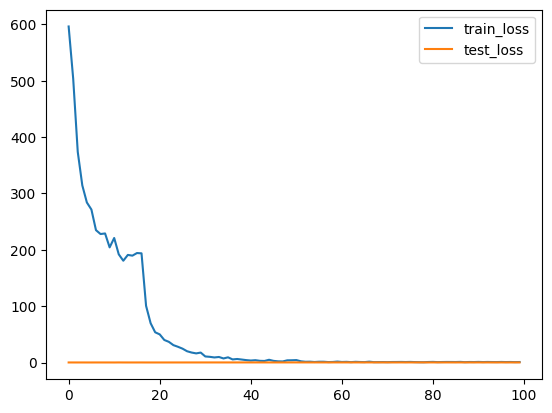

In [11]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])